In [99]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

import pathlib

In [100]:
data_folders = [
    pathlib.Path(f'./data/bicing/truncated/{y}') for y in [2021, 2022]
]

festivos_folder = pathlib.Path('./data/festivos')

In [101]:
# climate
df_climate_ = pd.read_csv('./data/clima.csv', parse_dates=['time'])

df_climate = df_climate_.assign(
    year=df_climate_.time.dt.year,
    month=df_climate_.time.dt.month,
    day=df_climate_.time.dt.day,
    hour=df_climate_.time.dt.hour
)

In [102]:
# station info
station_info = pd.read_csv('./data/bicing_info.csv').set_index('station_id')

In [103]:
# Festivos
import datetime


def spanish_date_to_datetime(sp_date: str):
    y, m, d = sp_date.split('/')[::-1]
    return datetime.date(int(y), int(m), int(d))


def get_festivos(folder):
    info_festivos = pd.concat([pd.read_csv(file, index_col=0) for file in folder.glob('*.csv')])
    s = pd.Series(name='date')
    for i, festivo in info_festivos.iterrows():
        start_date, end_date = spanish_date_to_datetime(festivo.DataInici), spanish_date_to_datetime(festivo.DataFi)

        dr = pd.date_range(start_date, end_date, freq='d').to_series()
        s = pd.concat([s, dr], ignore_index=True)

    return pd.DataFrame(s.sort_values()).assign(
        year=s.dt.year,
        month=s.dt.month,
        day=s.dt.day,
        festivo=True
    )


dias_festivos = get_festivos(festivos_folder)
display(dias_festivos)

/var/folders/83/62gh537j6t570tjdv33t3p2c0000gq/T/ipykernel_53636/3844953509.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(name='date')


,0,year,month,day,festivo
126,2019-01-05,2019,1,5,True
127,2019-01-17,2019,1,17,True
153,2019-02-02,2019,2,2,True
148,2019-02-08,2019,2,8,True
149,2019-02-09,2019,2,9,True
...,...,...,...,...,...
111,2022-09-23,2022,9,23,True
112,2022-09-24,2022,9,24,True
113,2022-09-25,2022,9,25,True
114,2022-09-26,2022,9,26,True


In [104]:
df = pd.concat([pd.read_csv(file, index_col=0) for data_folder in data_folders for file in
                data_folder.glob('*/*.csv')]).drop_duplicates()

In [105]:
df = pd.merge(left=df, right=df_climate.drop(columns=['time']), on=['hour', 'day', 'month', 'year'])

In [106]:
# df = pd.merge(left=df, right=dias_festivos[['festivo', 'day', 'month', 'year']], how='left', on=['day', 'month', 'year'])

In [107]:
df = pd.merge(left=df, right=station_info.reset_index()[['station_id', 'lat', 'lon', 'altitude', 'post_code']],
              on=['station_id'])

In [108]:
display(df.head())
display(df.describe())

,station_id,datetime,year,month,day,hour,num_bikes_available,num_docks_available,temperature_2m,total_cloud_cover,total_precipitation,windspeed_10m,lat,lon,altitude,post_code
0,1,2021-09-01 00:00:00,2021,9,1,0,39.153846,2.692308,294.819366,0.992767,4.745089e-07,3.946763,41.397978,2.180107,16,8013
1,1,2021-09-01,2021,9,1,0,38.500000,3.500000,294.819366,0.992767,4.745089e-07,3.946763,41.397978,2.180107,16,8013
2,1,2021-09-01 01:00:00,2021,9,1,1,31.000000,11.181818,294.803162,0.999283,1.583248e-07,3.491144,41.397978,2.180107,16,8013
3,1,2021-09-01 02:00:00,2021,9,1,2,27.333333,14.666667,294.813049,0.982894,6.328337e-07,1.647743,41.397978,2.180107,16,8013
4,1,2021-09-01 03:00:00,2021,9,1,3,27.769231,15.000000,294.714172,0.757832,1.740642e-06,1.862109,41.397978,2.180107,16,8013


,station_id,year,month,day,hour,num_bikes_available,num_docks_available,temperature_2m,total_cloud_cover,total_precipitation,windspeed_10m,lat,lon,altitude,post_code
count,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06,8.803501e+06
mean,2.615137e+02,2.021502e+03,6.527465e+00,1.573773e+01,1.150818e+01,9.533593e+00,1.586315e+01,2.900567e+02,5.194582e-01,6.643669e-05,2.981885e+00,4.139981e+01,2.168184e+00,3.549540e+01,8.021606e+03
std,1.493770e+02,4.999957e-01,3.442747e+00,8.810041e+00,6.929039e+00,7.819869e+00,8.199699e+00,6.233561e+00,3.626526e-01,3.138142e-04,1.764071e+00,2.104953e-02,2.448256e-02,3.256002e+01,4.210660e+01
min,1.000000e+00,2.021000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.752627e+02,0.000000e+00,0.000000e+00,2.885248e-02,4.134677e+01,2.109154e+00,2.000000e+00,8.001000e+03
25%,1.320000e+02,2.021000e+03,4.000000e+00,8.000000e+00,6.000000e+00,3.000000e+00,1.000000e+01,2.849116e+02,1.578594e-01,0.000000e+00,1.717799e+00,4.138390e+01,2.149910e+00,9.000000e+00,8.011000e+03
50%,2.630000e+02,2.022000e+03,7.000000e+00,1.600000e+01,1.200000e+01,8.000000e+00,1.608333e+01,2.894795e+02,5.304961e-01,0.000000e+00,2.606143e+00,4.139610e+01,2.170742e+00,2.500000e+01,8.019000e+03
75%,3.890000e+02,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,1.458333e+01,2.183333e+01,2.954477e+02,8.952284e-01,1.233676e-05,3.894956e+00,4.141207e+01,2.187244e+00,5.300000e+01,8.029000e+03
max,5.190000e+02,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.400000e+01,5.400000e+01,3.058843e+02,1.000000e+00,8.983023e-03,1.305881e+01,4.146209e+01,2.220691e+00,1.660000e+02,8.930000e+03


In [109]:
df = df.assign(
    percentage_docks_available=df.num_docks_available / (df.num_docks_available + df.num_bikes_available),
    # festivo=df.festivo.fillna('False'),
    altitude=df.altitude.astype(int)
)

In [110]:
df.head()

,station_id,datetime,year,month,day,hour,num_bikes_available,num_docks_available,temperature_2m,total_cloud_cover,total_precipitation,windspeed_10m,lat,lon,altitude,post_code,percentage_docks_available
0,1,2021-09-01 00:00:00,2021,9,1,0,39.153846,2.692308,294.819366,0.992767,4.745089e-07,3.946763,41.397978,2.180107,16,8013,0.064338
1,1,2021-09-01,2021,9,1,0,38.500000,3.500000,294.819366,0.992767,4.745089e-07,3.946763,41.397978,2.180107,16,8013,0.083333
2,1,2021-09-01 01:00:00,2021,9,1,1,31.000000,11.181818,294.803162,0.999283,1.583248e-07,3.491144,41.397978,2.180107,16,8013,0.265086
3,1,2021-09-01 02:00:00,2021,9,1,2,27.333333,14.666667,294.813049,0.982894,6.328337e-07,1.647743,41.397978,2.180107,16,8013,0.349206
4,1,2021-09-01 03:00:00,2021,9,1,3,27.769231,15.000000,294.714172,0.757832,1.740642e-06,1.862109,41.397978,2.180107,16,8013,0.350719


# Data Cleaning
1. quitar null
2. quitar > 100% ocupacion
3. .......

# Transformations

In [111]:
from datetime import date
import numpy as np

df = df.assign(
    date=lambda x: pd.to_datetime(dict(year=x.year, month=x.month, day=x.day)),
    day_of_week=lambda x: x.date.dt.day_of_week,
    is_weekend=lambda x: x.day_of_week >= 5,
    is_night=lambda x: np.bitwise_or(x.hour >= 20, x.hour <= 7),
    is_work_morning=lambda x: np.bitwise_and(x.hour >= 6, x.hour <= 10) & np.bitwise_not(x.is_weekend),
    is_summer=lambda x: x.month.between(6, 8),
)

display(df.head())

,station_id,datetime,year,month,day,hour,num_bikes_available,num_docks_available,temperature_2m,total_cloud_cover,...,lon,altitude,post_code,percentage_docks_available,date,day_of_week,is_weekend,is_night,is_work_morning,is_summer
0,1,2021-09-01 00:00:00,2021,9,1,0,39.153846,2.692308,294.819366,0.992767,...,2.180107,16,8013,0.064338,2021-09-01,2,False,True,False,False
1,1,2021-09-01,2021,9,1,0,38.500000,3.500000,294.819366,0.992767,...,2.180107,16,8013,0.083333,2021-09-01,2,False,True,False,False
2,1,2021-09-01 01:00:00,2021,9,1,1,31.000000,11.181818,294.803162,0.999283,...,2.180107,16,8013,0.265086,2021-09-01,2,False,True,False,False
3,1,2021-09-01 02:00:00,2021,9,1,2,27.333333,14.666667,294.813049,0.982894,...,2.180107,16,8013,0.349206,2021-09-01,2,False,True,False,False
4,1,2021-09-01 03:00:00,2021,9,1,3,27.769231,15.000000,294.714172,0.757832,...,2.180107,16,8013,0.350719,2021-09-01,2,False,True,False,False


# Simple Visualization

In [25]:
df.columns

Index(['station_id', 'datetime', 'year', 'month', 'day', 'hour',
       'num_bikes_available', 'num_docks_available', 'temperature_2m',
       'total_cloud_cover', 'total_precipitation', 'windspeed_10m', 'lat',
       'lon', 'altitude', 'post_code', 'percentage_docks_available', 'date',
       'day_of_week', 'is_weekend', 'is_night', 'is_work_morning', 'is_summer',
       'lat_d', 'lon_d'],
      dtype='object')

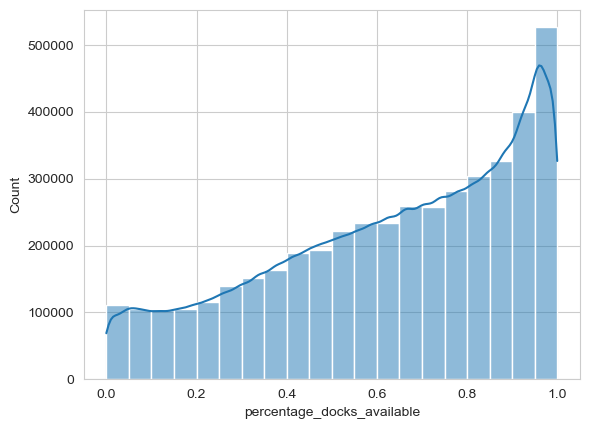

In [26]:
sns.histplot(data=df, x='percentage_docks_available', kde=True, bins=20)
plt.show()

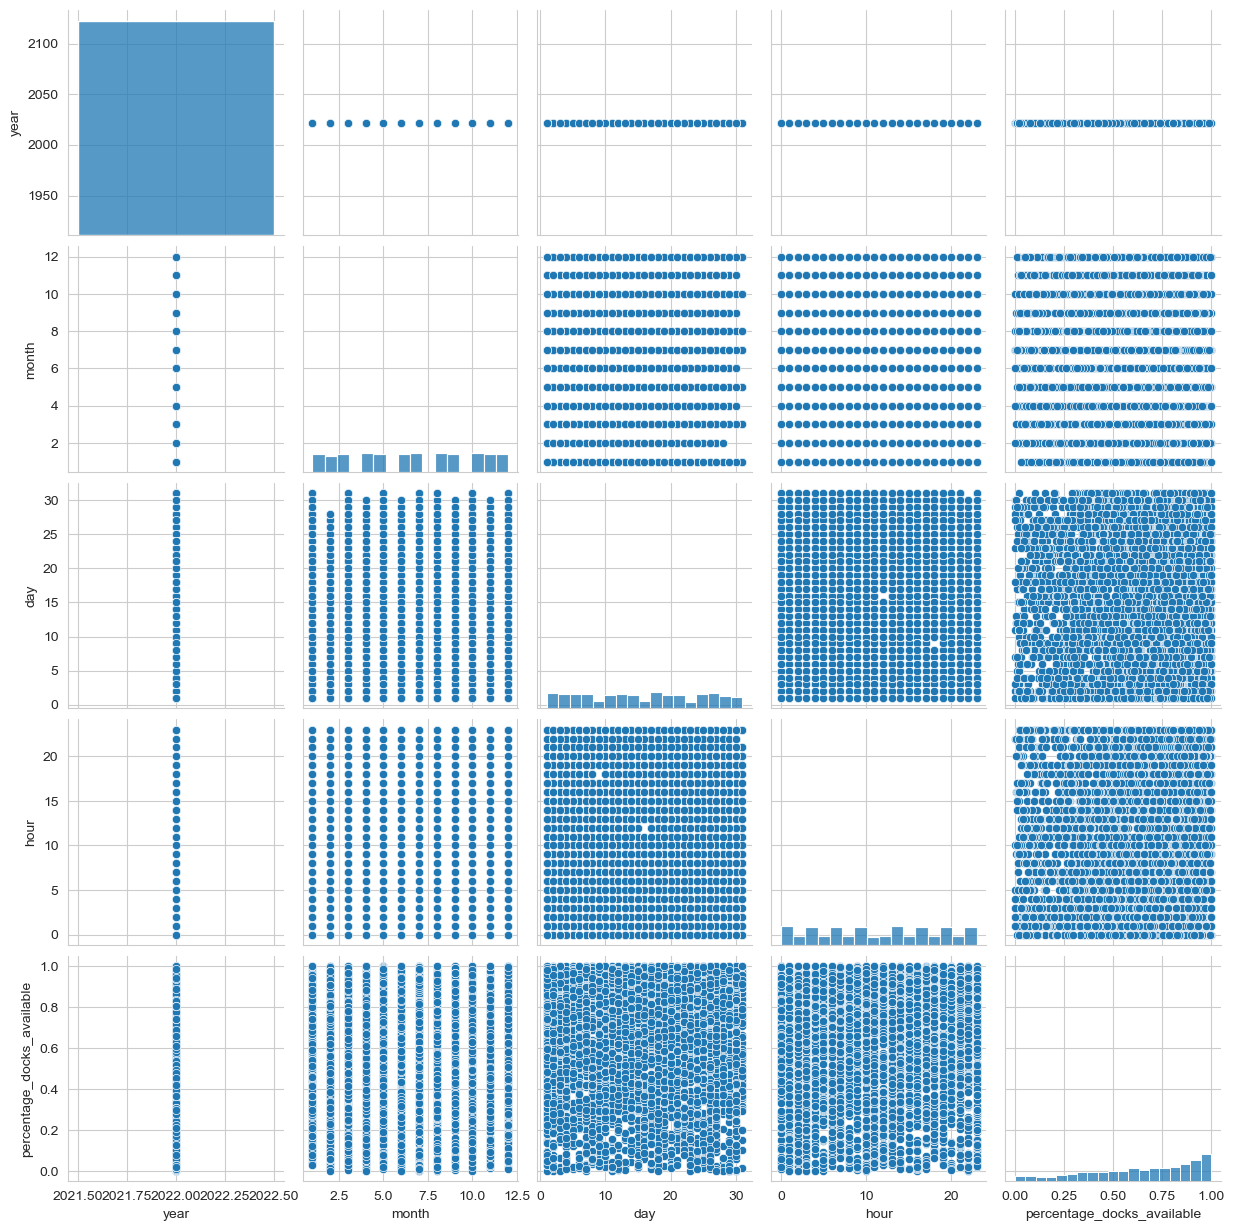

In [27]:
sns.pairplot(
    data=df[['year', 'month', 'day', 'hour', 'percentage_docks_available']].sample(frac=0.001),
)
plt.show()

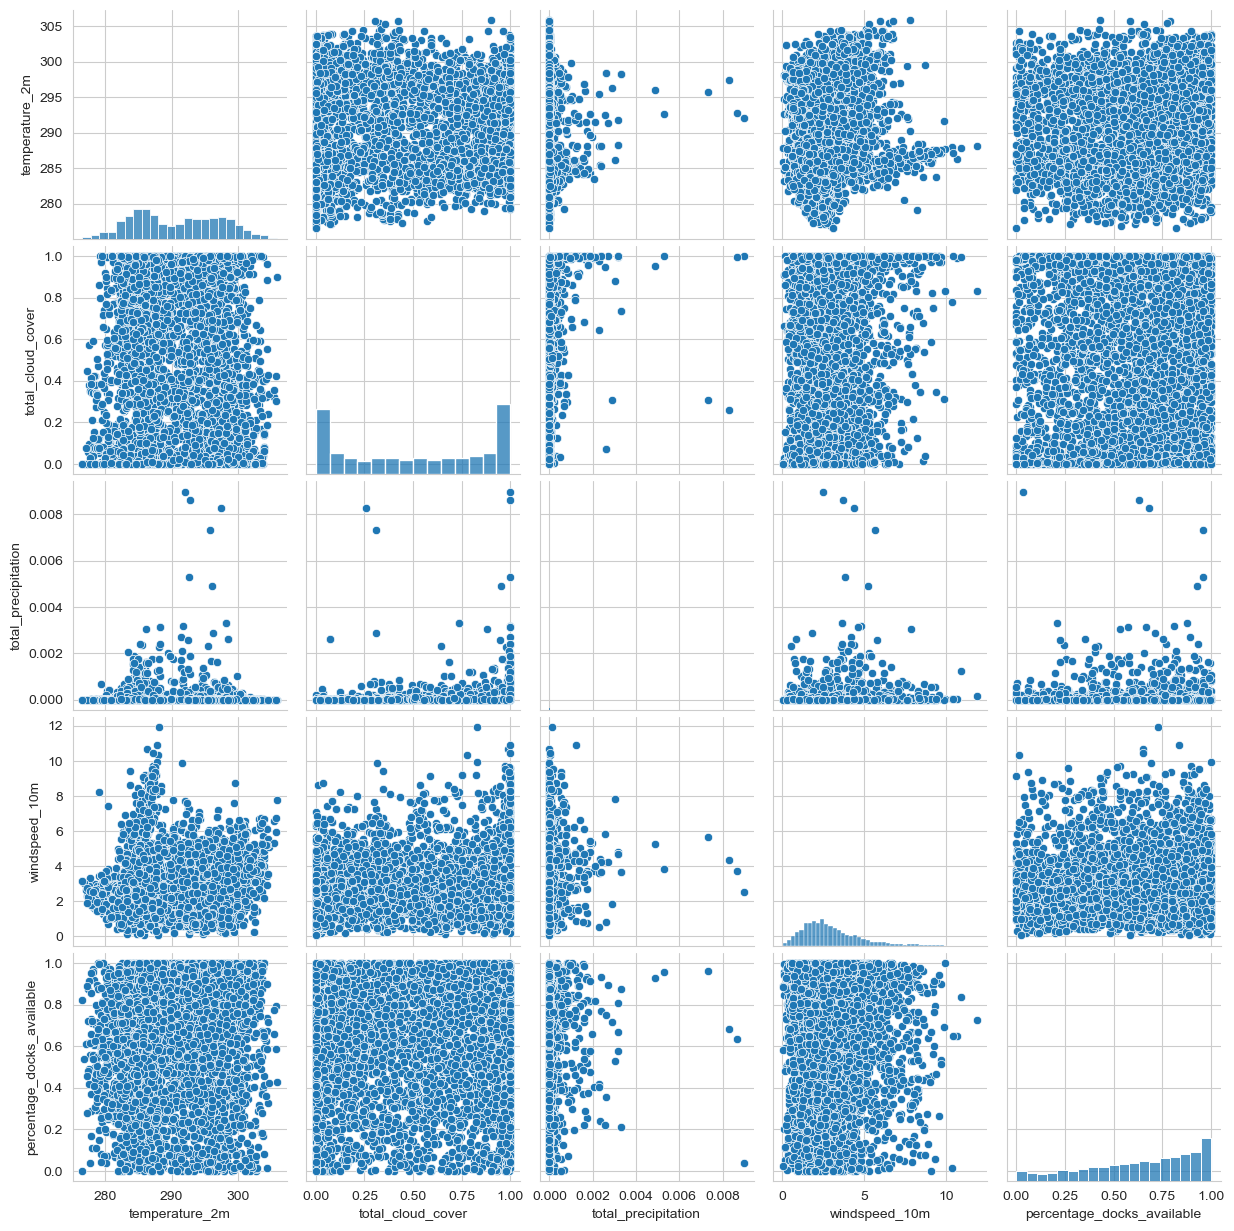

In [28]:
sns.pairplot(
    data=df[['temperature_2m', 'total_cloud_cover', 'total_precipitation', 'windspeed_10m',
             'percentage_docks_available']].sample(frac=0.001),
)
plt.show()

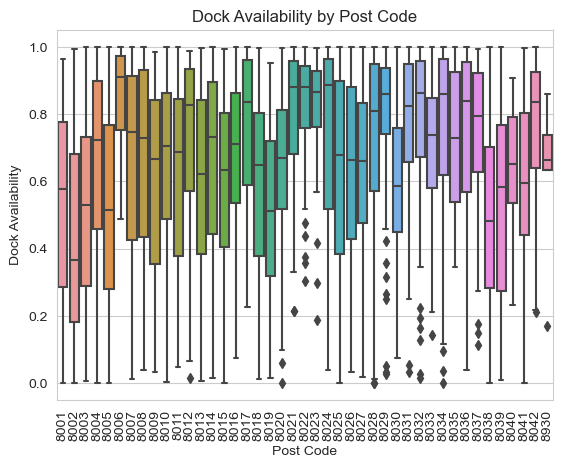

In [322]:
ax = sns.boxplot(
    data=df.assign(post_code=df.post_code.astype(int)).sample(frac=0.001),
    x="post_code",
    y="percentage_docks_available",
)
plt.xticks(rotation=90)
ax.set(
    title="Dock Availability by Post Code",
    xlabel="Post Code",
    ylabel="Dock Availability",
)
plt.show()

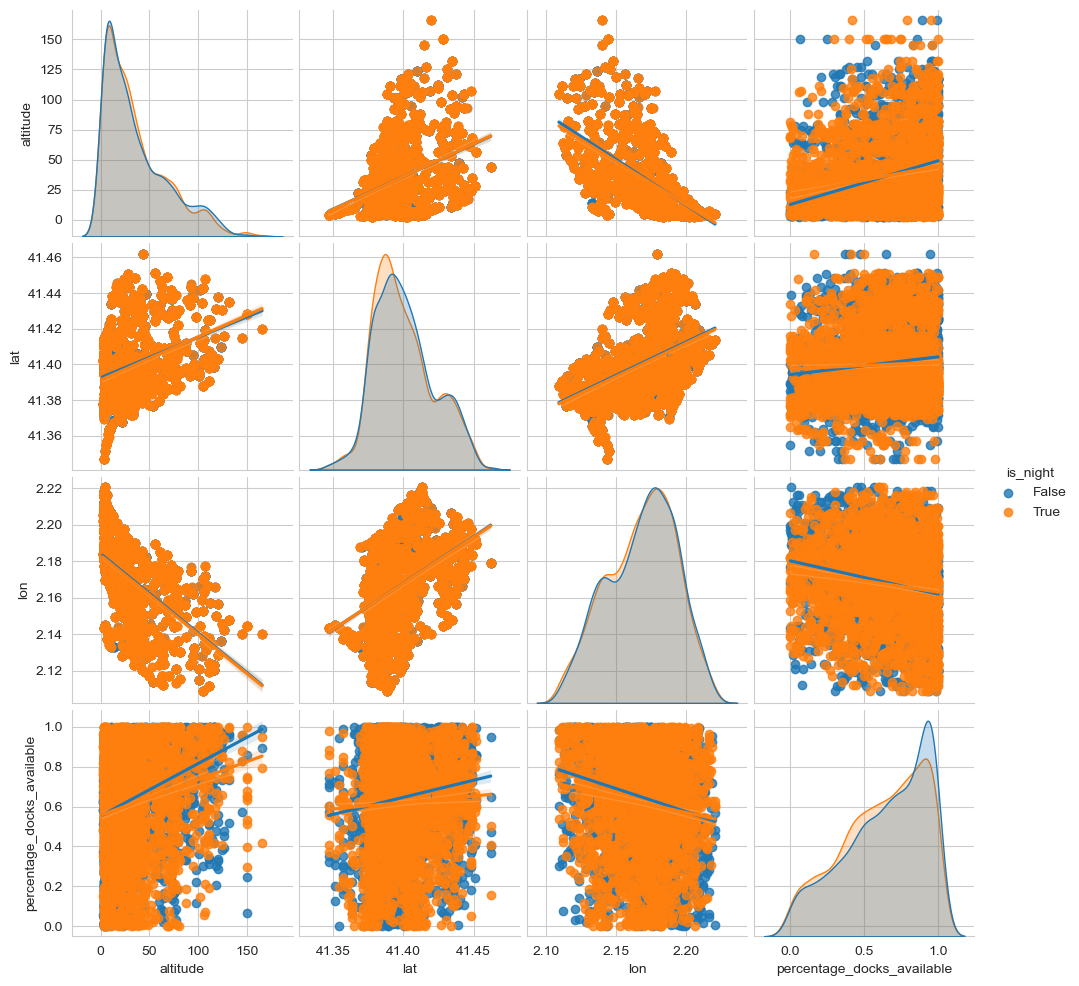

In [29]:
ax = sns.pairplot(
    data=df[['altitude', 'lat', 'lon', 'is_night', 'percentage_docks_available']].sample(frac=0.001),
    kind="reg",
    hue='is_night'
)
plt.show()

'is_night=True'

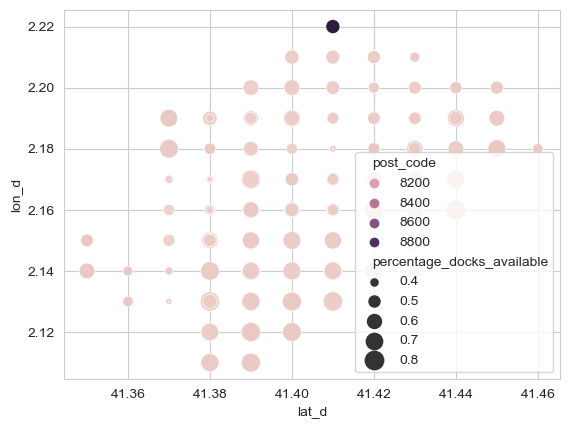

'is_night=False'

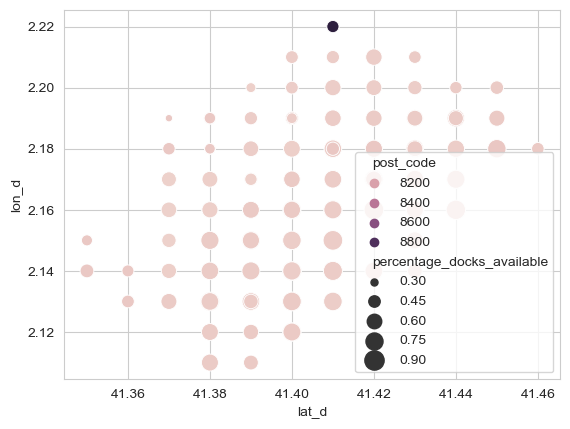

In [324]:
for is_night in [True, False]:
    location_df = df[df.is_night == is_night].groupby(['lat_d', 'lon_d', 'post_code'], as_index=False).agg(
        {'percentage_docks_available': 'mean'})
    display(f'{is_night=}')
    sns.scatterplot(
        data=location_df,
        x='lat_d',
        y='lon_d',
        hue='post_code',
        size='percentage_docks_available',
        sizes=(1, 200),
    )
    plt.show()

'is_night=True'

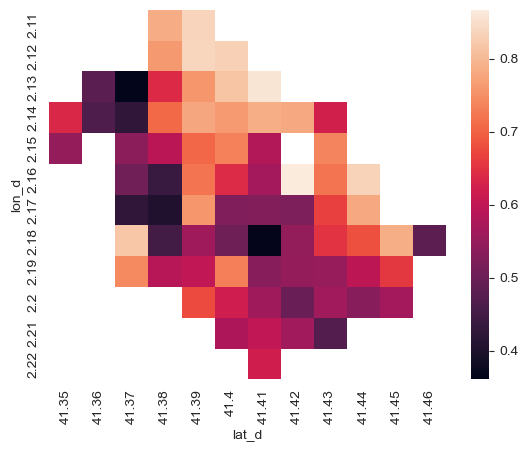

'is_night=False'

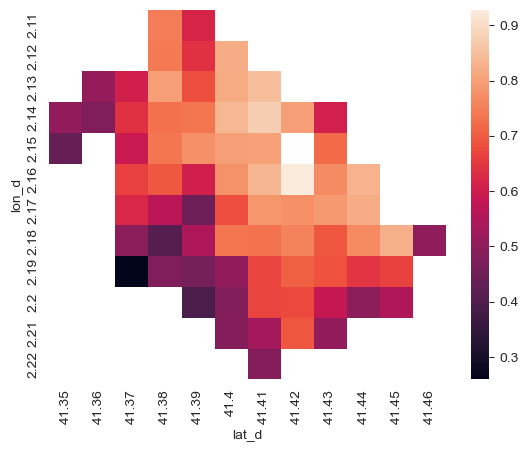

In [325]:
location_df = df.groupby(['lat_d', 'lon_d', 'is_night'], as_index=False).agg({'percentage_docks_available': 'mean'})
for is_night in [True, False]:
    display(f'{is_night=}')
    sns.heatmap(
        data=location_df[location_df.is_night == is_night].pivot_table(
            index='lon_d',
            columns='lat_d',
            values='percentage_docks_available',
            aggfunc='mean'
        ),
    )
    plt.show()

In [326]:
df_hourly = df.groupby(['hour', 'is_weekend', 'station_id'], as_index=False).agg({'percentage_docks_available': 'mean'})

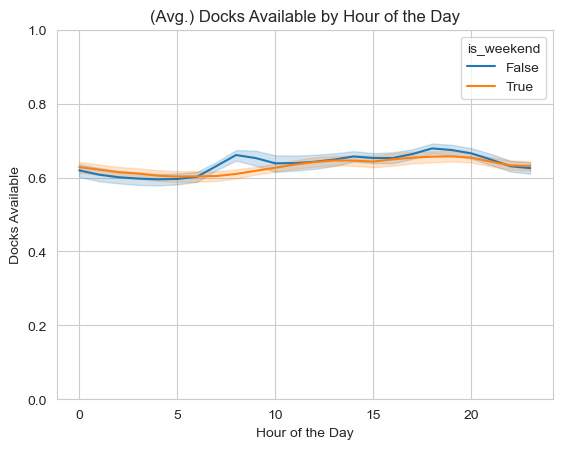

In [327]:
ax = sns.lineplot(
    data=df_hourly, x='hour', y='percentage_docks_available', hue='is_weekend'
)
ax.set(
    title='(Avg.) Docks Available by Hour of the Day',
    xlabel="Hour of the Day",
    ylabel="Docks Available",
)
plt.ylim([0, 1])
plt.show()

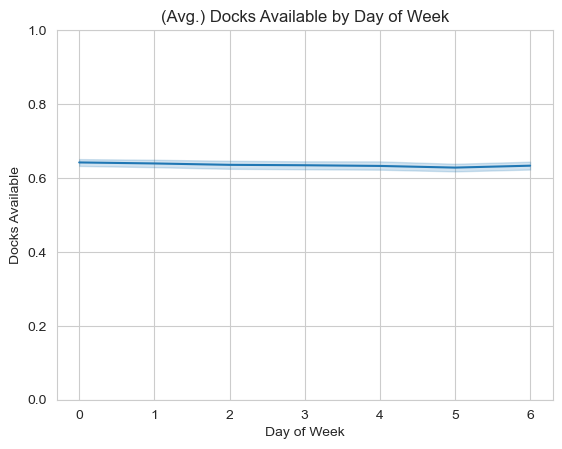

In [328]:
df_monthly = df.groupby(['day_of_week', 'station_id'], as_index=False).agg({'percentage_docks_available': 'mean'})

ax = sns.lineplot(
    data=df_monthly, x='day_of_week', y='percentage_docks_available'
)
ax.set(
    title='(Avg.) Docks Available by Day of Week',
    xlabel="Day of Week",
    ylabel="Docks Available",
)
plt.ylim([0, 1])
plt.show()


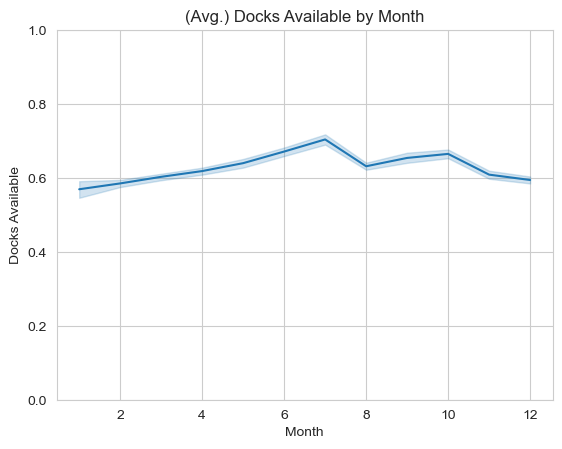

In [329]:
df_monthly = df.groupby(['month', 'station_id'], as_index=False).agg({'percentage_docks_available': 'mean'})

ax = sns.lineplot(
    data=df_monthly, x='month', y='percentage_docks_available',
)
ax.set(
    title='(Avg.) Docks Available by Month',
    xlabel="Month",
    ylabel="Docks Available",
)
plt.ylim([0, 1])
plt.show()


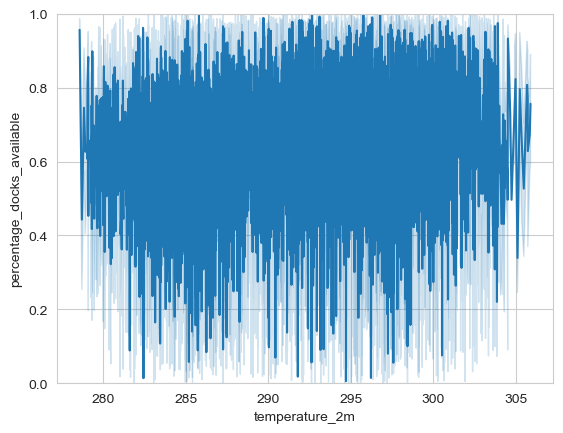

In [330]:
sns.lineplot(
    data=df.sample(frac=0.01),
    x="temperature_2m",
    y="percentage_docks_available"
)
ax.set(
    title='(Avg.) Docks Available by Temp (K)',
    xlabel="T",
    ylabel="Docks Available",
)
plt.ylim([0, 1])
plt.show()

## Visualize per station

In [31]:
df.columns

Index(['station_id', 'datetime', 'year', 'month', 'day', 'hour',
       'num_bikes_available', 'num_docks_available', 'temperature_2m',
       'total_cloud_cover', 'total_precipitation', 'windspeed_10m', 'lat',
       'lon', 'altitude', 'post_code', 'percentage_docks_available', 'date',
       'day_of_week', 'is_weekend', 'is_night', 'is_work_morning', 'is_summer',
       'lat_d', 'lon_d'],
      dtype='object')

In [32]:
station_ids = [20, 164, 133]

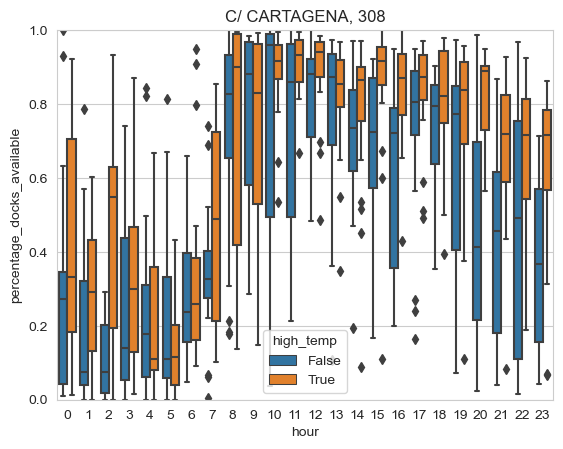

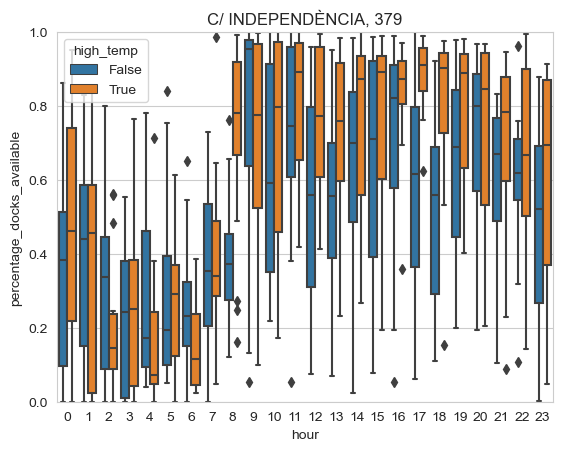

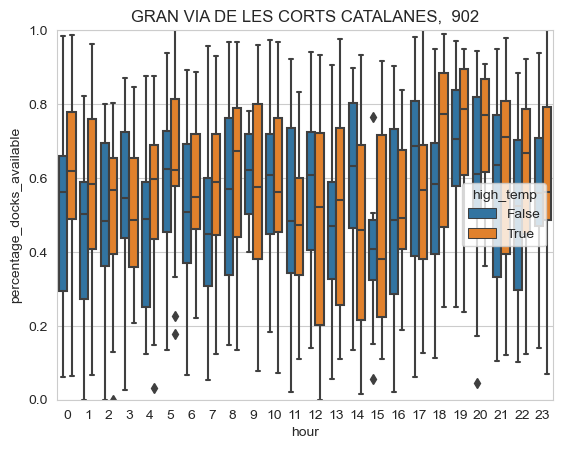

In [35]:
for station_id in station_ids:
    station_name = station_info.loc[station_id, 'name']
    df_ = df.query(f'station_id == {station_id}').sample(frac=0.1)
    ax = sns.boxplot(
        data=df_.assign(high_temp=df_.temperature_2m > df_.temperature_2m.quantile(0.5)),
        x='hour',
        hue='high_temp',
        y='percentage_docks_available',
        # x_bins=7
    )

    plt.ylim([0, 1])
    ax.set(
        title=station_name
    )
    plt.show()


In [40]:
df.columns

Index(['station_id', 'datetime', 'year', 'month', 'day', 'hour',
       'num_bikes_available', 'num_docks_available', 'temperature_2m',
       'total_cloud_cover', 'total_precipitation', 'windspeed_10m', 'lat',
       'lon', 'altitude', 'post_code', 'percentage_docks_available', 'date',
       'day_of_week', 'is_weekend', 'is_night', 'is_work_morning', 'is_summer',
       'lat_d', 'lon_d'],
      dtype='object')

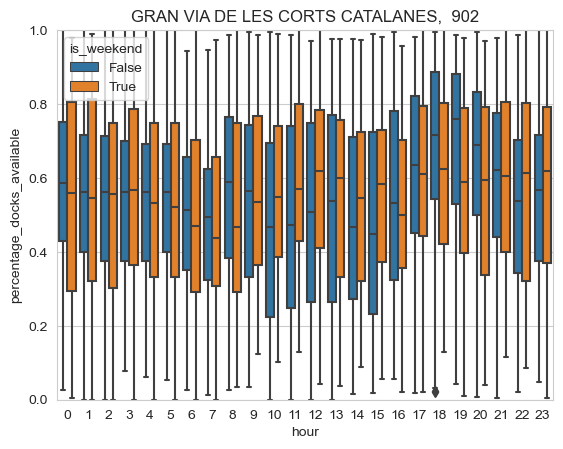

In [51]:
# "dificult" station
station_id = 133
station_name = station_info.loc[station_id, 'name']
df_ = df.query(f'station_id == {station_id}').sample(frac=0.1)
ax = sns.boxplot(
    data=df_.assign(is_raining=lambda x: x.total_precipitation>0),
    x='hour',
    y='percentage_docks_available',
    hue='is_weekend'
    # x_bins=7
)

plt.ylim([0, 1])
ax.set(
    title=station_name
)
plt.show()

# Train + Predict
Ideas:
* bucket for num variables

In [112]:
FEATURES = [
    'year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend', 'is_night', 'is_summer', 'is_work_morning',
    'temperature_2m', 'total_cloud_cover', 'total_precipitation', 'windspeed_10m',
    'lat', 'lon', 'altitude', 'post_code','station_id'
]
Y_COLUMN = 'percentage_docks_available'

df_ = df[~df[Y_COLUMN].isna()].sort_values(by=['datetime'])
X = df_[FEATURES].reset_index(drop=True)
y = df_[Y_COLUMN].reset_index(drop=True)

In [114]:
# load X_val
X_val = pd.read_csv('./data/validation/X_validation.csv', index_col="index")
X_val.head()

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1
index,,,,,,,,
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160


In [115]:
# add station_info
X_val_ = pd.merge(left=X_val, right=station_info.reset_index()[['station_id', 'lat', 'lon', 'altitude', 'post_code']],
                  on=['station_id'])
# add climate info
X_val_ = pd.merge(left=X_val_.assign(year=2023), right=df_climate.drop(columns=['time']),
                  on=['hour', 'day', 'month', 'year'])

X_val_ = X_val_.assign(
    altitude=lambda x: x.altitude.astype(int),

    date=lambda x: pd.to_datetime(dict(year=x.year, month=x.month, day=x.day)),
    day_of_week=lambda x: x.date.dt.day_of_week,
    is_weekend=lambda x: x.day_of_week >= 5,
    is_night=lambda x: np.bitwise_or(x.hour >= 20, x.hour <= 7),
    is_work_morning=lambda x: np.bitwise_and(x.hour >= 6, x.hour <= 10) & np.bitwise_not(x.is_weekend),
    is_summer=lambda x: x.month.between(6, 8),

    lat_d=lambda x: round(x.lat, 2),
    lon_d=lambda x: round(x.lon, 2),
)

X_val_

,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,lat,lon,...,total_precipitation,windspeed_10m,date,day_of_week,is_weekend,is_night,is_work_morning,is_summer,lat_d,lon_d
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,41.387306,2.163126,...,0.0,1.892034,2023-03-07,1,False,False,True,False,41.39,2.16
1,328,3,7,8,0.481481,0.506173,0.493827,0.580247,41.402988,2.134469,...,0.0,1.892034,2023-03-07,1,False,False,True,False,41.40,2.13
2,212,3,7,8,0.222222,0.152778,0.093750,0.232639,41.392235,2.130927,...,0.0,1.892034,2023-03-07,1,False,False,True,False,41.39,2.13
3,307,3,7,8,0.656250,0.656250,0.705729,0.776042,41.379199,2.113582,...,0.0,1.892034,2023-03-07,1,False,False,True,False,41.38,2.11
4,322,3,7,8,0.510417,0.569444,0.579861,0.819444,41.400900,2.138920,...,0.0,1.892034,2023-03-07,1,False,False,True,False,41.40,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54994,303,3,8,18,0.990741,0.836420,0.867284,0.953704,41.393432,2.115107,...,0.0,4.746478,2023-03-08,2,False,False,False,False,41.39,2.12
54995,79,3,8,18,0.114583,0.145833,0.104167,0.086806,41.385503,2.163477,...,0.0,4.746478,2023-03-08,2,False,False,False,False,41.39,2.16
54996,50,3,8,18,0.199074,0.064815,0.041667,0.162037,41.375115,2.170939,...,0.0,4.746478,2023-03-08,2,False,False,False,False,41.38,2.17
54997,346,3,8,18,0.143519,0.180556,0.154040,0.070513,41.360798,2.138931,...,0.0,4.746478,2023-03-08,2,False,False,False,False,41.36,2.14


In [116]:
m, n = X_val.shape
m_, n_ = X_val_.shape

display(m, n)
display(m_, n_)

assert m == m_

54999

8

54999

25

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn import neighbors, preprocessing, pipeline


# Try 1 (base line)

In [118]:
# Train
pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('float', preprocessing.StandardScaler(), float_columns),
                ('coords', preprocessing.StandardScaler(), coord_columns),
            ],
            remainder='drop'
        )),
        ('regressor', ensemble.RandomForestRegressor(n_jobs=-1, verbose=1)),
    ]
)
fitted_pipe = pipe.fit(X, y)

NameError: name 'float_columns' is not defined

In [ ]:
y_val_pred = fitted_pipe.predict(X_val_)

In [ ]:
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

In [119]:
results_folder = pathlib.Path('results/test1/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / 'try1.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
pipeline:
---------
{str(pipe)}

train data:
-----------
 * only with 2022

features:
---------
{pipe['transformer'].get_feature_names_out()}
    """
    fw.write(info)


NameError: name 'y_val_pred' is not defined

# Try 2 (more features)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   35.0s finished


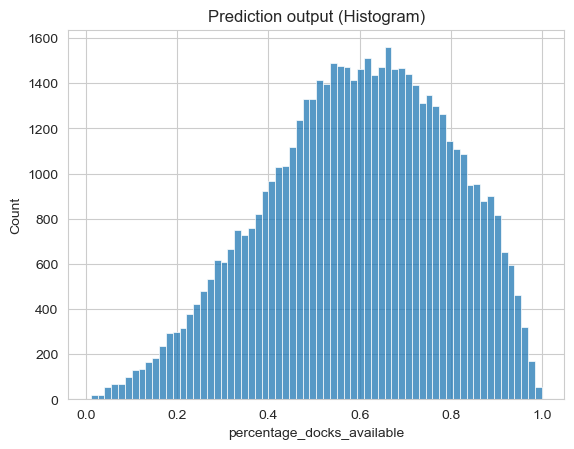

In [264]:
# Train
pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('float', preprocessing.StandardScaler(), ["altitude"]),
                ('coords', preprocessing.StandardScaler(), ["lat_d", "lon_d"]),
                ('climate', preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform'),
                 ["temperature_2m"]),

                # ('bool', preprocessing.OneHotEncoder(handle_unknown="ignore", drop="first"), ["is_summer", "is_night", "is_work_morning"]),
            ],
            remainder='drop'
        )),
        ('regressor', ensemble.RandomForestRegressor(n_jobs=-1, verbose=3)),
    ]
)
fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

In [265]:
results_folder = pathlib.Path('results/test2/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / 'try2.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
pipeline:
---------
{str(pipe)}

train data:
-----------
 * only with 2022

features:
---------
{pipe['transformer'].get_feature_names_out()}
    """
    fw.write(info)

In [266]:
pipe['transformer'].get_feature_names_out(), fitted_pipe["regressor"].feature_importances_

array([0.18620793, 0.03052662, 0.03213207, 0.75113337])

# Try 3 (K-Bins)

In [278]:
X

,is_weekend,is_night,is_summer,out_time,is_work_morning,altitude,festivo,month,temperature_2m,hour,lat_d,lon_d
0,False,True,False,False-True-False,False,30,False,2,282.209229,0,41.38,2.14
1,False,True,False,False-True-False,False,48,False,2,282.209229,0,41.40,2.16
2,False,True,False,False-True-False,False,3,False,2,282.209229,0,41.40,2.21
3,False,True,False,False-True-False,False,27,False,2,282.209229,0,41.40,2.17
4,False,True,False,False-True-False,False,5,False,2,282.209229,0,41.42,2.21
...,...,...,...,...,...,...,...,...,...,...,...,...
4077690,True,True,False,True-True-False,False,23,False,1,283.058850,0,41.44,2.19
4077691,True,True,False,True-True-False,False,72,False,1,283.058850,0,41.44,2.18
4077692,True,True,False,True-True-False,False,5,False,1,283.058850,0,41.39,2.20
4077693,True,True,False,True-True-False,False,88,False,1,283.058850,0,41.41,2.17


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


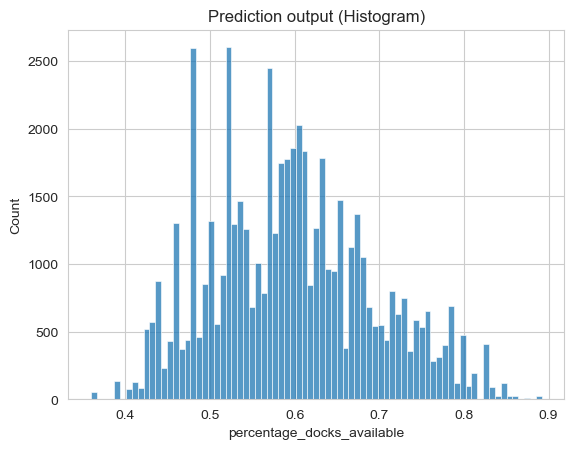

In [282]:
# Train
pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('float', preprocessing.StandardScaler(), ["altitude"]),
                ('coords', preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'),
                 ["lat", "lon"]),
                ('climate', preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'),
                 ["temperature_2m"]),

                # ('bool', preprocessing.OneHotEncoder(handle_unknown="ignore", drop="first"), ["is_summer", "is_night", "is_work_morning"]),
            ],
            remainder='drop'
        )),
        ('regressor', ensemble.RandomForestRegressor(n_jobs=-1, verbose=1)),
    ]
)
fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

display(pd.Series(
    fitted_pipe["regressor"].feature_importances_,
    pipe['transformer'].get_feature_names_out(),
))
n = 3
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / f'try_{n}.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
pipeline:
---------
{str(pipe)}

features:
---------
{pipe['transformer'].get_feature_names_out()}
    """
    fw.write(info)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


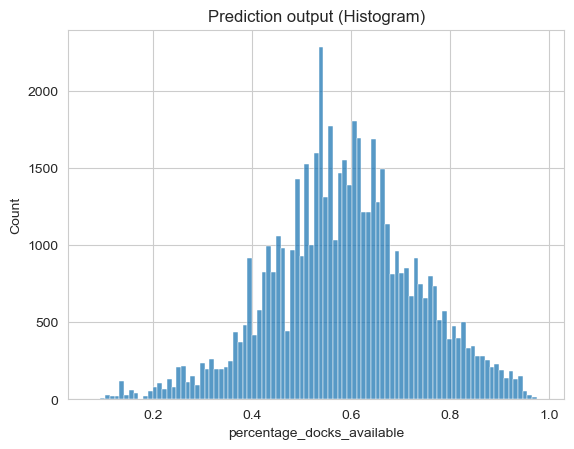

float__altitude            0.517256
coords__lat                0.105357
coords__lon                0.067017
climate__temperature_2m    0.076845
bool__is_night_True        0.059568
bool__is_weekend_True      0.046484
date__month                0.047966
date__hour                 0.079507
dtype: float64

In [291]:
# Train
n = 4

pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('float', preprocessing.StandardScaler(), ["altitude"]),
                ('coords', preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'),
                 ["lat", "lon"]),
                ('climate', preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'),
                 ["temperature_2m"]),
                (
                    'bool', preprocessing.OneHotEncoder(handle_unknown="ignore", drop="first"),
                    ["is_night", "is_weekend"]),
                ('date', preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'),
                 ["month", "hour"]),
            ],
            remainder='drop'
        )),
        ('regressor', ensemble.RandomForestRegressor(n_jobs=-1, verbose=1)),
    ]
)
fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)

# Visualize
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

display(pd.Series(
    fitted_pipe["regressor"].feature_importances_,
    pipe['transformer'].get_feature_names_out(),
))

# Save results
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / f'try_{n}.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
pipeline:
---------
{str(pipe)}

features:
---------
{pipe['transformer'].get_feature_names_out()}
    """
    fw.write(info)

In [123]:
from sklearn import ensemble
# Train
n = 5

pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('float', preprocessing.StandardScaler(), ["altitude"]),
                ('coords', preprocessing.KBinsDiscretizer(n_bins=8, encode='onehot', strategy='uniform'),
                 ["lat", "lon"]),
                ('climate', preprocessing.KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform'),
                 ["temperature_2m", "total_cloud_cover", "total_precipitation"]),
            ],
            remainder='drop'
        )),
        ('regressor', ensemble.RandomForestRegressor(
            max_depth=10,
            # max_features=,
            # max_samples=,
            n_jobs=-1, verbose=1
        )),
    ]
)
fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)

# Visualize
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

display(pd.Series(
    fitted_pipe["regressor"].feature_importances_,
    pipe['transformer'].get_feature_names_out(),
))

# Save results
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / f'try_{n}.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
features:
---------
{pipe['transformer'].get_feature_names_out()}

pipeline:
---------
{str(pipe)}
    """
    fw.write(info)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.

KeyboardInterrupt



In [551]:
X

,year,month,day,hour,day_of_week,is_weekend,is_night,is_summer,is_work_morning,temperature_2m,...,total_precipitation,windspeed_10m,festivo,lat,lon,altitude,post_code,lat_d,lon_d,station_id
0,2022,2,1,0,1,False,True,False,False,282.209229,...,0.000144,3.183017,False,41.375695,2.135857,30,8014,41.38,2.14,188
1,2022,2,1,0,1,False,True,False,False,282.209229,...,0.000144,3.183017,False,41.398344,2.159824,48,8012,41.40,2.16,223
2,2022,2,1,0,1,False,True,False,False,282.209229,...,0.000144,3.183017,False,41.400831,2.206645,3,8005,41.40,2.21,166
3,2022,2,1,0,1,False,True,False,False,282.209229,...,0.000144,3.183017,False,41.396994,2.170632,27,8009,41.40,2.17,362
4,2022,2,1,0,1,False,True,False,False,282.209229,...,0.000144,3.183017,False,41.416043,2.212499,5,8019,41.42,2.21,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077690,2023,1,1,0,6,True,True,False,False,283.058850,...,0.000000,2.105985,False,41.442091,2.192899,23,8030,41.44,2.19,258
4077691,2023,1,1,0,6,True,True,False,False,283.058850,...,0.000000,2.105985,False,41.441700,2.178155,72,8016,41.44,2.18,469
4077692,2023,1,1,0,6,True,True,False,False,283.058850,...,0.000000,2.105985,False,41.390605,2.197231,5,8005,41.39,2.20,117
4077693,2023,1,1,0,6,True,True,False,False,283.058850,...,0.000000,2.105985,False,41.412135,2.165222,88,8024,41.41,2.17,276


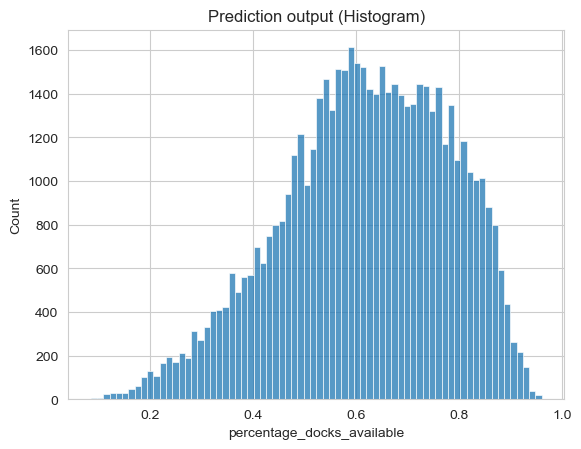

AttributeError: Transformer std (type FunctionTransformer) does not provide get_feature_names_out.

In [122]:
# Train
n = 6

pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('std', preprocessing.FunctionTransformer(), ['station_id', 'hour']),
                ('bool', preprocessing.OneHotEncoder(), ['is_weekend']),
            ]
        )),
        ('regressor', neighbors.KNeighborsRegressor(n_neighbors=300)),
    ],
)
X = X.query('year == 2022')
y = y.loc[X.index]

fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)

# Visualize
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

# Save results
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / f'try_{n}.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
features:
---------
{pipe['transformer'].get_feature_names_out()}

pipeline:
---------
{str(pipe)}
    """
    fw.write(info)

In [607]:
X.columns

Index(['year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend', 'is_night',
       'is_summer', 'is_work_morning', 'temperature_2m', 'total_cloud_cover',
       'total_precipitation', 'windspeed_10m', 'festivo', 'lat', 'lon',
       'altitude', 'post_code', 'lat_d', 'lon_d', 'station_id'],
      dtype='object')

Iteration 1, loss = 0.02750215
Iteration 2, loss = 0.02526492
Iteration 3, loss = 0.02469518
Iteration 4, loss = 0.02437152
Iteration 5, loss = 0.02416492
Iteration 6, loss = 0.02400293
Iteration 7, loss = 0.02390072
Iteration 8, loss = 0.02380444
Iteration 9, loss = 0.02372909
Iteration 10, loss = 0.02367029
Iteration 11, loss = 0.02362123
Iteration 12, loss = 0.02358399
Iteration 13, loss = 0.02354926
Iteration 14, loss = 0.02352497
Iteration 15, loss = 0.02349415
Iteration 16, loss = 0.02345686
Iteration 17, loss = 0.02344345
Iteration 18, loss = 0.02341550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


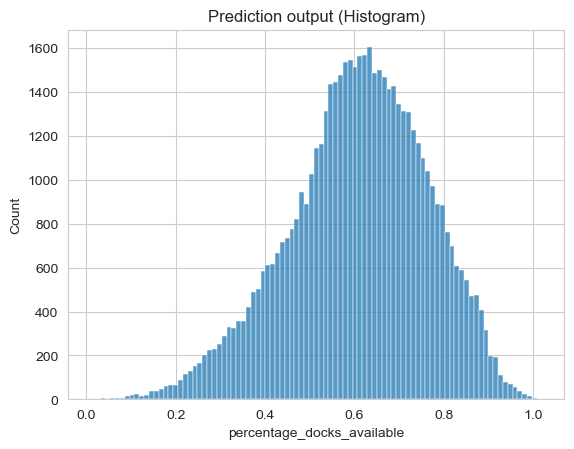

In [610]:

# Train
n = 7

pipe = pipeline.Pipeline(
    [
        ('transformer', ColumnTransformer(
            [
                ('std', preprocessing.StandardScaler(),
                 ['lat', 'lon', 'altitude', 'temperature_2m', 'hour', 'day_of_week', 'month', 'total_precipitation']),
            ]
        )),
        ('regressor', neural_network.MLPRegressor(hidden_layer_sizes=(100, 100), verbose=3)),
    ],
)

fitted_pipe = pipe.fit(X, y)
y_val_pred = fitted_pipe.predict(X_val_)

# Visualize
ax = sns.histplot(x=y_val_pred)
ax.set(
    title='Prediction output (Histogram)',
    xlabel=Y_COLUMN,
)
plt.show()

# Save results
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_val_pred).to_csv(results_folder / f'try_{n}.csv', index=False)

with open(results_folder / 'info.txt', 'w') as fw:
    info = f"""
features:
---------
{pipe['transformer'].get_feature_names_out()}

pipeline:
---------
{str(pipe)}
    """
    fw.write(info)

# Create 1 model per station ID
Let's go with linear regression for the sake of time :D

In [67]:
from dataclasses import dataclass
from sklearn import linear_model
from typing import List, Dict


# create model per
@dataclass
class BicingRegression:
    grouping_column_name: str

    regressor_class: type = None
    verbose:int = 0

    groups_: List[int] = None
    regressors_: Dict[int, object] = None

    def __post_init__(self):
        self.regressors_ = self.regressors_ or {}
        self.regressor_class = self.regressor_class or linear_model.LinearRegression

    def fit(self, X, y, weights=None):
        self.groups_ = X.loc[:, self.grouping_column_name].unique()

        for ii, group in enumerate(self.groups_):
            if self.verbose>0:
                print(f'Training regressor {ii+1}/{len(self.groups_)}')
            self.regressors_[group] = self.regressor_class()

            X_ = X.query(f'{self.grouping_column_name} == {group}')
            y_ = y.loc[X_.index]

            self.regressors_[group].fit(X_, y_)

        return self

    def predict(self, X):
        results = pd.DataFrame(
            index=X.index,
            columns=['prediction']
        )

        for group in self.groups_:
            X_ = X.query(f'{self.grouping_column_name} == {group}')
            if len(X_) == 0:
                continue
            y_pred = self.regressors_[group].predict(X_)
            results.loc[X_.index, 'prediction'] = y_pred

        return results['prediction']


features = ['hour']
grouping = "station_id"




In [87]:
ct = ColumnTransformer(
    [
        ('12bins_onehot', preprocessing.KBinsDiscretizer(n_bins=12, encode='onehot', strategy='uniform'), ["hour"]),
    ],
    remainder='passthrough'
)
X_train = ct.fit_transform(X[features + [grouping]]).toarray()
X_train = pd.DataFrame(
    X_train,
    columns=ct.get_feature_names_out().tolist(),
    index=y.index
)
X_train.head()

,12bins_onehot__hour_0.0,12bins_onehot__hour_1.0,12bins_onehot__hour_2.0,12bins_onehot__hour_3.0,12bins_onehot__hour_4.0,12bins_onehot__hour_5.0,12bins_onehot__hour_6.0,12bins_onehot__hour_7.0,12bins_onehot__hour_8.0,12bins_onehot__hour_9.0,12bins_onehot__hour_10.0,12bins_onehot__hour_11.0,remainder__station_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,271.0


In [88]:
from sklearn import ensemble

br = BicingRegression(
    grouping_column_name=f'remainder__{grouping}',
    regressor_class=ensemble.RandomForestRegressor,
    verbose=3
)
br = br.fit(
    X_train,
    y
)

Training regressor 0/507
Training regressor 1/507
Training regressor 2/507
Training regressor 3/507
Training regressor 4/507
Training regressor 5/507
Training regressor 6/507
Training regressor 7/507
Training regressor 8/507
Training regressor 9/507
Training regressor 10/507
Training regressor 11/507
Training regressor 12/507
Training regressor 13/507
Training regressor 14/507
Training regressor 15/507
Training regressor 16/507
Training regressor 17/507
Training regressor 18/507
Training regressor 19/507
Training regressor 20/507
Training regressor 21/507
Training regressor 22/507
Training regressor 23/507
Training regressor 24/507
Training regressor 25/507
Training regressor 26/507
Training regressor 27/507
Training regressor 28/507
Training regressor 29/507
Training regressor 30/507
Training regressor 31/507
Training regressor 32/507
Training regressor 33/507
Training regressor 34/507
Training regressor 35/507
Training regressor 36/507
Training regressor 37/507
Training regressor 38/

In [92]:
X_val_df_ = pd.DataFrame(
    ct.transform(X_val_).toarray(),
    columns=ct.get_feature_names_out().tolist(),
    index=X_val_.index
)

In [93]:
# predict
y_small_test_pred = br.predict(X_val_df_)

In [94]:
n=8
results_folder = pathlib.Path(f'results/test{n}/')
results_folder.mkdir(parents=True, exist_ok=True)

pd.DataFrame(
    index=X_val_.index,
).assign(index=X_val_.index, percentage_docks_available=y_small_test_pred).to_csv(results_folder / f'try_{n}.csv', index=False)
